# WeatherPy
----

Key Observable Trends
1.  The maximum temperature is warmest between latitudes of zero and 20, which is near the equator.  The maximum temperature gradually declines as you move away from the equator.
2.  The humidity is higher as you move closer to the equator also.
3.  Cloudiness varies widely per city, and is not correlated with latitude.
4.  Most cities have an average wind speed of between 0 and 15 miles per hour, and is not correlated with latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
# Create dataframe of random cities
cities_dict = {
    "city": cities
}
cities_data = pd.DataFrame(cities_dict)
cities_data['Record_ID'] = cities_data.index
#print(cities_data)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info
lat = []
temp_max = []
humidity = []
wind = []
clouds = []


# Loop through the list of cities and perform a request for data on each
# Print not found for the exceptions.
print("Beginning Data Retrieval")
print("----------------------------- ")
for index, row in cities_data.iterrows():
    city = row["city"]
    try:
        #print(f"Processing record xx | {Record_ID}")
        print(f"Processing record xx | {city}")
        print(query_url + city)
        response = requests.get(query_url + city).json()
        cities_data.loc[index, "latitude"] = response['coord']['lat']
        cities_data.loc[index, "temp_max"] = response['main']['temp_max']
        cities_data.loc[index, "humidity"] = response['main']['humidity']
        cities_data.loc[index, "wind"] = response['wind']['speed']
        cities_data.loc[index, "clouds"] = response['clouds']['all']
    except:
        print(f"{city} not found")
print("----------------------------- ")
print("Ending Data Retrieval")
print("----------------------------- ")

Beginning Data Retrieval
----------------------------- 
Processing record xx | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bambous virieux
Processing record xx | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=upernavik
Processing record xx | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=cabo san lucas
Processing record xx | cape town
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=cape town
Processing record xx | atuona
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=atuona
Processing record xx | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=vaitupu
vaitupu not found
Processing record xx | saleaula
http:/

Processing record xx | mazatlan
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mazatlan
Processing record xx | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tasiilaq
Processing record xx | vaini
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=vaini
Processing record xx | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=geraldton
Processing record xx | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mar del plata
Processing record xx | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=kodiak
Processing record xx | boiro
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bo

Processing record xx | senneterre
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=senneterre
Processing record xx | busselton
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=busselton
Processing record xx | chicama
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=chicama
Processing record xx | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=arraial do cabo
Processing record xx | ngorongoro
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=ngorongoro
Processing record xx | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=leningradskiy
Processing record xx | kailua
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f3781

Processing record xx | padang
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=padang
Processing record xx | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mitsamiouli
Processing record xx | klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=klaksvik
Processing record xx | mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mys shmidta
mys shmidta not found
Processing record xx | fallon
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=fallon
Processing record xx | ust-nera
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=ust-nera
Processing record xx | codrington
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174

Processing record xx | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=havre-saint-pierre
Processing record xx | amazar
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=amazar
Processing record xx | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=dhidhdhoo
Processing record xx | neu wulmstorf
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=neu wulmstorf
Processing record xx | vao
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=vao
Processing record xx | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=san patricio
Processing record xx | touros
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13d

Processing record xx | bogandinskiy
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bogandinskiy
Processing record xx | saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=saint-joseph
Processing record xx | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=norman wells
Processing record xx | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mayor pablo lagerenza
Processing record xx | jacksonville beach
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=jacksonville beach
Processing record xx | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=aklavik
Processing record xx | lebu
http://api.openweathermap.org/data/2.5/w

temaraia not found
Processing record xx | naze
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=naze
Processing record xx | alton
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=alton
Processing record xx | nabire
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=nabire
Processing record xx | kabanjahe
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=kabanjahe
Processing record xx | asekeyevo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=asekeyevo
Processing record xx | saint albans
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=saint albans
Processing record xx | luau
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imp

Processing record xx | fujin
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=fujin
Processing record xx | vaovai
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=vaovai
vaovai not found
Processing record xx | lancaster
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=lancaster
Processing record xx | tarauaca
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tarauaca
Processing record xx | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=lorengau
Processing record xx | lokken verk
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=lokken verk
lokken verk not found
Processing record xx | warqla
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192

Processing record xx | tolaga bay
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tolaga bay
Processing record xx | buariki
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=buariki
buariki not found
Processing record xx | qostanay
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=qostanay
Processing record xx | tiarei
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tiarei
Processing record xx | kamina
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=kamina
Processing record xx | canutama
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=canutama
Processing record xx | wau
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imper

Processing record xx | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=coihaique
Processing record xx | kavant
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=kavant
kavant not found
Processing record xx | sattahip
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=sattahip
Processing record xx | chokwe
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=chokwe
Processing record xx | churapcha
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=churapcha
Processing record xx | camacha
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=camacha
Processing record xx | cahors
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imp

Processing record xx | tigzirt
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tigzirt
Processing record xx | likasi
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=likasi
Processing record xx | portland
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=portland
Processing record xx | wakkanai
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=wakkanai
Processing record xx | wilhelmshaven
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=wilhelmshaven
Processing record xx | sandnessjoen
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=sandnessjoen
Processing record xx | luziania
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=

In [6]:
# Export the city data into a .csv file.
cities_data.to_csv(r"output_data/cities.csv")
cities_data.head()

,city,Record_ID,latitude,temp_max,humidity,wind,clouds
0,bambous virieux,0,-20.34,82.40,65.0,9.17,40.0
1,upernavik,1,72.79,1.87,89.0,5.10,100.0
2,cabo san lucas,2,22.89,70.00,49.0,8.05,40.0
3,cape town,3,-33.93,66.99,93.0,8.05,75.0
4,atuona,4,-9.80,81.36,78.0,21.47,20.0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
import datetime

now = datetime.datetime.now()

#print "Current date and time using str method of datetime object:"
current_mthday = (("%d" % now.month) + "-" + ("%d" % now.day))
current_year = (now.strftime("%y"))

current_date = current_mthday + "-" + current_year

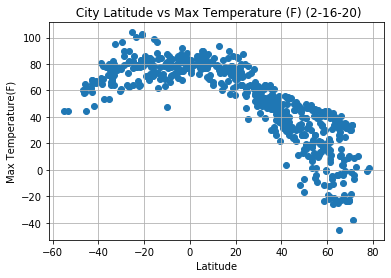

In [9]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title(f" City Latitude vs Max Temperature (F) ({current_date})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

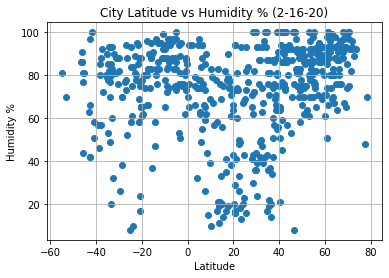

In [10]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity % ({current_date})")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

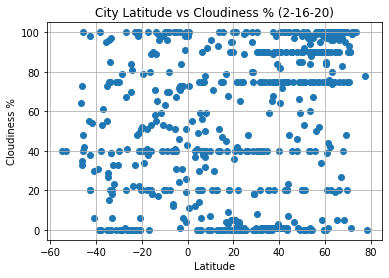

In [11]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness % ({current_date})")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

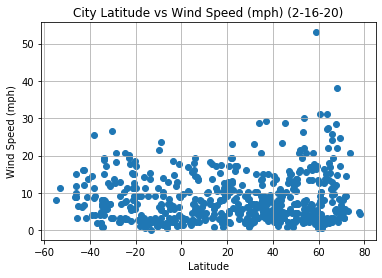

In [12]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed (mph) ({current_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()